In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv(r'E:\Projects\Data Science Projects\Data Science Salary\5. Model Building\EDA_Data.csv')

In [3]:
df.shape

(742, 33)

In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn',
       'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority',
       'desc_len', 'num_Competitors', 'company_txt'],
      dtype='object')

In [5]:
df_model=df[['Rating', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'num_Competitors', 'hourly', 'employer_provided', 'job_state', 'same_state', 'age', 'python_yn',
       'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len', 'avg_salary']]

### Getting Dummy Data

In [6]:
df_dum=pd.get_dummies(df_model)

In [7]:
df_dum.shape

(742, 170)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X=df_dum.drop('avg_salary', axis=1)
y=df_dum.avg_salary.values
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
df_dum.columns

Index(['Rating', 'num_Competitors', 'hourly', 'employer_provided',
       'same_state', 'age', 'python_yn', 'rstudio_yn', 'spark_yn', 'aws_yn',
       ...
       'job_simp_analyst', 'job_simp_data engineer', 'job_simp_data scientist',
       'job_simp_director', 'job_simp_manager', 'job_simp_mle', 'job_simp_na',
       'seniority_jr', 'seniority_na', 'seniority_senior'],
      dtype='object', length=170)

In [11]:
df_dum.head()

,Rating,num_Competitors,hourly,employer_provided,same_state,age,python_yn,rstudio_yn,spark_yn,aws_yn,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,3.8,0,0,0,0,47,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,3.4,0,0,0,0,36,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,4.8,0,0,0,1,10,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,3.8,3,0,0,1,55,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,2.9,3,0,0,1,22,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [12]:
import statsmodels.api as sm

In [13]:
X_sm=X=sm.add_constant(X)
model=sm.OLS(y, X_sm)


In [14]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     10.65
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           1.15e-96
Time:                        21:06:49   Log-Likelihood:                -3314.7
No. Observations:                 742   AIC:                             6903.
Df Residuals:                     605   BIC:                             7535.
Df Model:                         136                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                44.0287      6.665      6.606      0.000      30.939      57.119
Rating                                                3.8126      1.878      2.030      0.043       0.124       7.502
num_Competitors                                       2.5904      0.835      3.104      0.002       0.951       4.230
hourly                                              -34.8861      9.043     -3.858      0.000     -52.646     -17.126
employer_provided                                    38.1817     10.074      3.790      0.000      18.397      57.966
same_state                                            2.6152      2.578      1.015      0.311      -2.447       7.677
age                                                   0.0308      0.029      1.050      0.294      -0.027       0.088
python_yn                                             8.2232      2.490      3.303      0.001       3.334      13.113
rstudio_yn                                           18.7334     22.802      0.822      0.412     -26.047      63.514
spark_yn                                              0.2432      2.887      0.084      0.933      -5.426       5.913
aws_yn                                                1.5703      2.703      0.581      0.561      -3.737       6.878
excel_yn                                             -0.2396      2.215     -0.108      0.914      -4.589       4.110
desc_len                                          -3.034e-05      0.001     -0.040      0.968      -0.002       0.001
Type of ownership_-1                                 11.6644     11.721      0.995      0.320     -11.354      34.683
Type of ownership_College / University                8.8609     16.934      0.523      0.601     -24.396      42.117
Type of ownership_Company - Private                   8.9033      5.139      1.732      0.084      -1.190      18.996
Type of ownership_Company - Public                   12.6667      5.593      2.265      0.024       1.684      23.650
Type of ownership_Government                        -17.7019     15.133     -1.170      0.243     -47.422      12.018
Type of ownership_Hospital                           -9.5910      9.630     -0.996      0.320     -28.503       9.321
Type of ownership_Nonprofit Organization            -11.0623      6.664     -1.660      0.097     -24.151       2.026
Type of ownership_Other Organization                 -3.0375     14.199     -0.214      0.831     -30.923      24.848
Type of ownership_School / School District           -2.0174     23.342     -0.086      0.931     -47.859      43.824
Type of ownership_Subsidiary or Business Segment     12.8227      6.848      1.873      0.062      -0.625      26.271
Type of ownersh

In [15]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score


In [16]:
lm=LinearRegression()

In [17]:
lm.fit(X_train, y_train)
np.mean(cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-897357197.5247484

In [33]:
lm_l=Lasso()
lm_l.fit(X_train, y_train)
np.mean(cross_val_score(lm_l, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-21.08337679312196

C:\Users\Hp\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157.07438289397396, tolerance: 57.224473989898996
  model = cd_fast.enet_coordinate_descent(


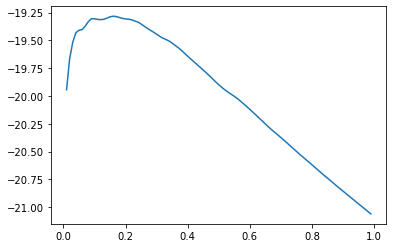

In [19]:
alpha=[]
error=[]

for i in range(1,100):
    alpha.append(i/100)
    lml=Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)))

plt.plot(alpha,error)

In [20]:
err=tuple(zip(alpha,error))
df_err=pd.DataFrame(err, columns=['alpha', 'error'])
df_err[df_err.error==max(df_err.error)]

,alpha,error
15,0.16,-19.282357


In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rf=RandomForestRegressor()

In [23]:
np.mean(cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-14.924005452152661

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
parameters={'n_estimators':range(10,300,10), 'criterion': ('mse', 'mae'), 'max_features':('auto', 'sqrt', 'log2')}
gs=GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv=3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [26]:
gs.best_score_

-14.829970136684487

In [31]:
gs.best_estimator_

RandomForestRegressor(n_estimators=220)

In [34]:
tpred_lm=lm.predict(X_test)
tpred_lml=lm_l.predict(X_test)
tpred_rf=gs.best_estimator_.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, tpred_lm)
mean_absolute_error(y_test, tpred_lml)
mean_absolute_error(y_test, tpred_rf)

mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

14.366396453771966

In [36]:
import pickle
pickl={'model': gs.best_estimator_}
pickle.dump(pickl, open('model_file' + ".p", "wb"))

file_name="model_file.p"
with open(file_name, 'rb')as pickled:
    data=pickle.load(pickled)
    model=data['model']

model.predict(X_test.iloc[1,:].values.reshape(1,-1))

array([51.63409091])